<a href="https://colab.research.google.com/github/vinymendes/Computacao_Grafica/blob/main/Trabalho_de_Computa%C3%A7%C3%A3o_Gr%C3%A1fica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implemente modifica√ß√µes visuais em uma imagem: realiza√ß√£o de transla√ß√£o, rota√ß√£o, escalonamento e transforma√ß√µes compostas com base em dados de entrada. Fa√ßa com que o usu√°rio possa escolher o que ele deseja realizar.



Integrantes do grupo:

- Pedro Henrique de Ara√∫jo Ribeiro
- Dimitri Santana Marinho
- Jo√£o Victor Moura Brand√£o
- Bruno Magalh√£es Cardoso
- Marcus Vinicius Mendes Carneiro Ribeiro
- Guilherme de Meneses Mota

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import Image, display
from matplotlib import pyplot as plt
from google.colab import files
import numpy as np
import shutil
import cv2
import os

In [ ]:
def upload_image():
    # Faz o upload da imagem
    uploaded = files.upload()

    # Obt√©m o nome do arquivo carregado
    file_name = list(uploaded.keys())[0]

    # Mostra a imagem carregada
    display(Image(filename=file_name))

    # Retorna o nome do arquivo para ser usado posteriormente, se necess√°rio
    return file_name

In [ ]:
def salvar_imagem_google_colab(image_name, imagem_para_salvar):
    # Especifica o caminho da nova pasta
    caminho_nova_pasta = '/content/trabalho_computacao_grafica'

    # Verifica se a pasta j√° existe; se n√£o existir, cria
    if not os.path.exists(caminho_nova_pasta):
        os.makedirs(caminho_nova_pasta)
        # print(f"A pasta {caminho_nova_pasta} foi criada com sucesso.")
    # else:
      # print(f"A pasta {caminho_nova_pasta} j√° existe.")

    nome_da_imagem = image_name + ".jpg"
    path = f'/content/trabalho_computacao_grafica/{nome_da_imagem}'

    # Verifica se a imagem j√° existe no caminho especificado
    if os.path.exists(path):
        # Se existir, exclui o arquivo existente
        os.remove(path)
        # print(f"A imagem {nome_da_imagem} existente foi removida.")

    # Salva a nova imagem no caminho especificado
    cv2.imwrite(path, imagem_para_salvar)

    return path

In [ ]:
def limpar_pasta_content():
    pasta_content = '/content'

    # Verifica se a pasta 'content' existe
    if os.path.exists(pasta_content):
        # Lista todos os arquivos e subpastas na pasta 'content'
        conteudo = os.listdir(pasta_content)

        # Itera sobre o conte√∫do e remove cada item individualmente
        for item in conteudo:
            caminho_item = os.path.join(pasta_content, item)

            # Verifica se √© um arquivo e o remove
            if os.path.isfile(caminho_item):
                os.remove(caminho_item)
            # Se for uma pasta, remove recursivamente
            elif os.path.isdir(caminho_item):
                shutil.rmtree(caminho_item)

        print(f'Conte√∫do da pasta {pasta_content} removido com sucesso.')
    else:
        print(f'A pasta {pasta_content} n√£o existe.')

In [ ]:
def translacao_imagem(imagem, dx, dy):
    # L√™ a imagem
    img = cv2.imread(imagem)

    # Obt√©m as dimens√µes da imagem
    linhas, colunas, _ = img.shape

    # Define a matriz de transforma√ß√£o para a transla√ß√£o
    matriz_translacao = np.float32([[1, 0, dx], [0, 1, dy]])

    # Aplica a transla√ß√£o usando a fun√ß√£o warpAffine do OpenCV
    img_transladada = cv2.warpAffine(img, matriz_translacao, (colunas, linhas))

    image_path = salvar_imagem_google_colab('img_transladada', img_transladada)

    return img_transladada, image_path

In [ ]:
def rotate_image(image_path, angle):
    # Carrega a imagem usando o OpenCV
    image = cv2.imread(image_path)

    # Obt√©m altura e largura da imagem
    height, width = image.shape[:2]

    # Calcula o ponto central da imagem
    center = (width / 2, height / 2)

    # Define a matriz de rota√ß√£o
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Realiza a rota√ß√£o da imagem
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    image_path = salvar_imagem_google_colab('rotated_image', rotated_image)

    return rotated_image, image_path

In [ ]:
def converter_para_preto_e_branco(image_path_original):
    # Carrega a imagem usando o OpenCV
    imagem_colorida = cv2.imread(image_path_original)

    if imagem_colorida is not None:
        # Converte a imagem para escala de cinza
        imagem_pb = cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2GRAY)

        # Salva a imagem em preto e branco
        caminho_imagem_saida = '/content/img_saida_pb.jpg'
        cv2.imwrite(caminho_imagem_saida, imagem_pb)

        print(f'Imagem preto e branco salva em: {caminho_imagem_saida}')

        return imagem_pb, caminho_imagem_saida
    else:
        print(f'Erro ao carregar a imagem: {image_path_original}')
        return None, None

In [ ]:
def escalonar_imagem(imagem, escala_percentual):
    # Lendo a imagem do URL
    img = cv2.imread(imagem)

    # Obtendo as dimens√µes originais da imagem
    height, width = img.shape[:2]

    # Calculando as novas dimens√µes com base na escala_percentual
    nova_altura = int(height * escala_percentual / 100)
    nova_largura = int(width * escala_percentual / 100)

    # Redimensionando a imagem
    imagem_redimensionada = cv2.resize(img, (nova_largura, nova_altura))

    # Exibindo a imagem redimensionada
    cv2_imshow(imagem_redimensionada)

    image_path = salvar_imagem_google_colab('imagem_redimensionada', imagem_redimensionada)

    return imagem_redimensionada, image_path

In [ ]:
def espelhar_imagem(image_path_original):
    imagem_original = cv2.imread(image_path_original)
    imagem_espelhada = cv2.flip(imagem_original, 1)
    print(f'Imagem espelhada: {imagem_espelhada}')

Saving F-gLdhUXQAAzWn3.jpeg to F-gLdhUXQAAzWn3.jpeg


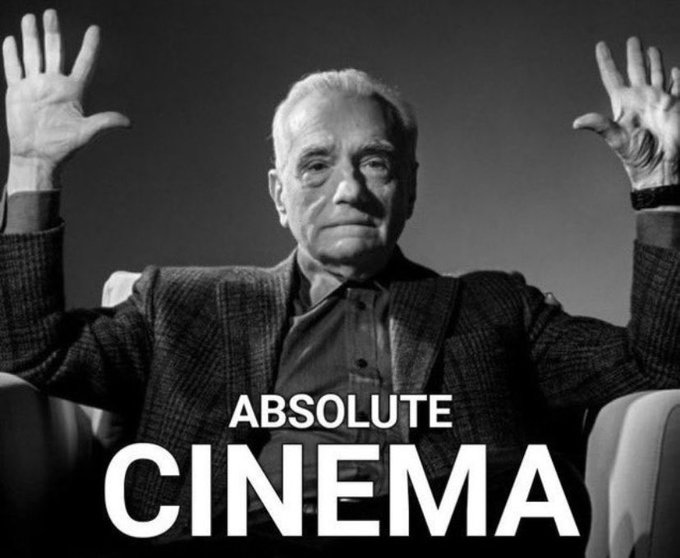

Imagem carregada: F-gLdhUXQAAzWn3.jpeg


In [ ]:
# Uso da fun√ß√£o upload_image()
image_path_original = upload_image()
print(f'Imagem carregada: {image_path_original}')

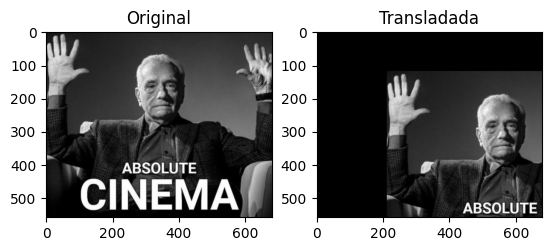

In [ ]:
# Uso da fun√ß√£o translacao_imagem()
imagem_transladada, image_path = translacao_imagem(image_path_original, 210, 120)

# Exibe a imagem original e a imagem transladada lado a lado
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(cv2.imread(image_path_original), cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imagem_transladada, cv2.COLOR_BGR2RGB)), plt.title('Transladada')
plt.show()

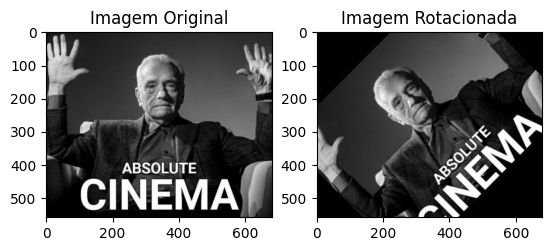

In [ ]:
# Uso da fun√ß√£o rotate_image()
angle = 45  # √Çngulo de rota√ß√£o desejado

rotated_image, image_path = rotate_image(image_path_original, angle)

# Exibe a imagem original e a imagem rotacionada
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path_original), cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Imagem Rotacionada")

plt.show()

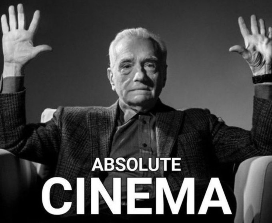

In [ ]:
# Uso da fun√ß√£o escalonar_imagem()
escala_percentual = 40  # Altere para a escala desejada (50 significa 50% do tamanho original)

imagem_resultante, path = escalonar_imagem(image_path_original, escala_percentual)

In [ ]:
# Uso da fun√ß√£o limpar_pasta_content()
limpar_pasta_content() # Chama a fun√ß√£o para limpar a pasta 'content'

Conte√∫do da pasta /content removido com sucesso.


In [ ]:
# Transforma√ß√µes compostas com base em dados de entrada

image_path_original = upload_image()
print(f'Imagem carregada: {image_path}')

escala_percentual = 150  # Altere para a escala desejada (50 significa 50% do tamanho original)

imagem_resultante, image_path_escalonamento = escalonar_imagem(image_path_original, escala_percentual)

angle = 45  # √Çngulo de rota√ß√£o desejado

rotated_image, image_path_rotacao = rotate_image(image_path_escalonamento, angle)

# Exibe a imagem original e a imagem rotacionada
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path_escalonamento), cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Imagem Rotacionada")

plt.show()

imagem_transladada, image_path = translacao_imagem(image_path_rotacao, 250, 230)

# Exibe a imagem original e a imagem transladada lado a lado
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(cv2.imread(image_path_rotacao), cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imagem_transladada, cv2.COLOR_BGR2RGB)), plt.title('Transladada')
plt.show()

IndexError: ignored

No contexto de manipula√ß√£o de imagens com transforma√ß√µes compostas com base em dados de entrada, isso se refere a permitir que o usu√°rio especifique uma s√©rie de transforma√ß√µes que ser√£o aplicadas √† imagem. Essas transforma√ß√µes podem incluir transla√ß√£o (mover a imagem para cima, para baixo, para a esquerda ou para a direita), rota√ß√£o, escalonamento (aumentar ou diminuir o tamanho da imagem) e outras transforma√ß√µes visuais.

A ideia √© que o usu√°rio forne√ßa dados de entrada, como valores espec√≠ficos para os par√¢metros de transla√ß√£o, rota√ß√£o e escalonamento. Esses dados de entrada s√£o ent√£o utilizados para compor uma sequ√™ncia de transforma√ß√µes que s√£o aplicadas √† imagem. A transforma√ß√£o resultante √© o produto da aplica√ß√£o sequencial dessas opera√ß√µes.

Por exemplo, se o usu√°rio especificar uma transla√ß√£o de 20 pixels para a direita, seguida de uma rota√ß√£o de 45 graus no sentido anti-hor√°rio e, finalmente, um escalonamento de 1.5x, as transforma√ß√µes seriam compostas nessa ordem. Cada transforma√ß√£o √© aplicada com base no resultado da transforma√ß√£o anterior, resultando em uma imagem transformada de maneira complexa.

Novo LOOP / Apresenta√ß√£o do Programa

Testar para ver se estar certo

Saving F8ErqR8WUAAv4pc.jpeg to F8ErqR8WUAAv4pc (3).jpeg


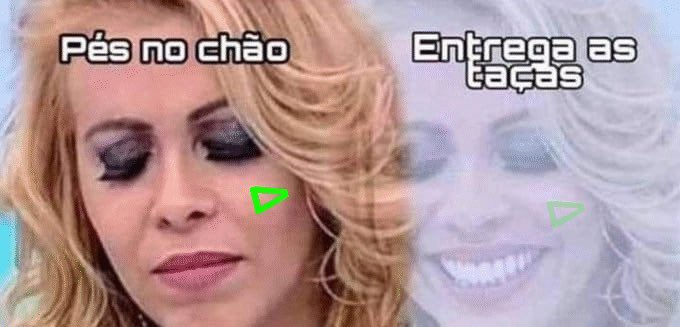


‚ú® Imagem carregada com sucesso: F8ErqR8WUAAv4pc (3).jpeg ‚ú®
| Bem-vindo ao Programa de Manipula√ß√£o de Imagens |

üåü Antes de come√ßarmos, precisamos que voc√™ realize o upload da imagem desejada. üåü
Certifique-se de selecionar a imagem correta para garantir resultados precisos.


Digite  1 Transla√ß√£o da imagem; 				|
Digite  2 Rota√ß√£o da imagem;					|
Digite  3 Escalonamento da imagem;				|
Digite  4 para deixar a imagem em preto e branco		|
Digite  5 para espelhar a imagem						|
Digite  6 para selecionar uma nova imagem		|
Digite  0 para sair.								|

Escolha uma op√ß√£o: 1

üöÄ Voc√™ escolheu realizar a transla√ß√£o da imagem. Vamos come√ßar!

Qual a dist√¢ncia do eixo x deseja utilizar na transla√ß√£o? 52

Qual a dist√¢ncia do eixo y deseja utilizar na transla√ß√£o? 65


UnboundLocalError: ignored

In [ ]:
# Apresenta√ß√£o do programa de manipula√ß√£o de imagens

image_path_original = upload_image()
print(f"\n‚ú® Imagem carregada com sucesso: {image_path_original} ‚ú®")


d = "Digite"

def main():
    menu()
    exec()

def menu():
    print("====================================================")
    print("| Bem-vindo ao Programa de Manipula√ß√£o de Imagens |")

    print("====================================================")
    print("\nüåü Antes de come√ßarmos, precisamos que voc√™ realize o upload da imagem desejada. üåü")
    print("Certifique-se de selecionar a imagem correta para garantir resultados precisos.")

    print("\n")
    print(f"{d}  1 Transla√ß√£o da imagem; \t\t\t\t|")
    print(f"{d}  2 Rota√ß√£o da imagem;\t\t\t\t\t|")
    print(f"{d}  3 Escalonamento da imagem;\t\t\t\t|")
    print(f"{d}  4 para deixar a imagem em preto e branco\t\t|")
    print(f"{d}  5 para espelhar a imagem\t\t\t\t\t\t|")
    print(f"{d}  6 para selecionar uma nova imagem\t\t|")
    print(f"{d}  0 para sair.\t\t\t\t\t\t\t\t|")
    return

def exec():
    n = ' '

    while n != '0':
        n = input('\nEscolha uma op√ß√£o: ')

        if n == '1':
            print("\nüöÄ Voc√™ escolheu realizar a transla√ß√£o da imagem. Vamos come√ßar!")

            distancia_x = int(input("\nQual a dist√¢ncia do eixo x deseja utilizar na transla√ß√£o? "))
            distancia_y = int(input("\nQual a dist√¢ncia do eixo y deseja utilizar na transla√ß√£o? "))

            imagem_transladada, image_path = translacao_imagem(image_path_original, distancia_x, distancia_y)

            # Exibe a imagem original e a imagem transladada lado a lado
            plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(cv2.imread(image_path_original), cv2.COLOR_BGR2RGB)), plt.title('Original')
            plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imagem_transladada, cv2.COLOR_BGR2RGB)), plt.title('Transladada')
            plt.show()


        elif n == '2':
            print("\nüîÑ Voc√™ escolheu realizar a rota√ß√£o da imagem. Vamos come√ßar!")

            rotated_angle = int(input("\nQual o √¢ngulo de rota√ß√£o deseja utilizar? "))

            rotated_image, image_path = rotate_image(image_path_original, rotated_angle )

            # Exibe a imagem original e a imagem rotacionada lado a lado
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(cv2.imread(image_path_original), cv2.COLOR_BGR2RGB))
            plt.title("Imagem Original")
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
            plt.title("Imagem Rotacionada")
            plt.show()

        elif n == '3':
            print("\nüîç Voc√™ escolheu realizar o escalonamento da imagem. Vamos come√ßar!")
            escala_percentual = int(input("\nQual a escala desejada (exemplo: 50 significa 50% do tamanho original)? "))
            imagem_resultante, path = escalonar_imagem(image_path_original, escala_percentual)

        elif n == '4':
            imagem_pb, caminho_imagem_saida_pb = converter_para_preto_e_branco(image_path_original)
            if imagem_pb is not None and caminho_imagem_saida_pb is not None:
                # Fa√ßa algo com a imagem em preto e branco, se necess√°rio
                # Por exemplo, exibir a imagem ou realizar outras opera√ß√µes

                # Mostrar a imagem em preto e branco
                cv2_imshow(imagem_pb)
                print(f'Imagem preto e branco salva em: {caminho_imagem_saida_pb}')


        elif n == '5':
          print('\n Voc√™ escolheu espelhar a imagem')
          espelhar_imagem(image_path_original)
          print(f'Imagem espelhada: {espelhar_imagem}')

        elif n == '6':
            image_path_original = upload_image()
            print(f"\n‚ú® Nova imagem carregada com sucesso: {image_path_original} ‚ú®")


        elif n == '0':
            print("\n Voc√™ escolheu Sair!")
            break

        else:
            print("\n Escolha uma op√ß√£o v√°lida!")

        menu()

main()